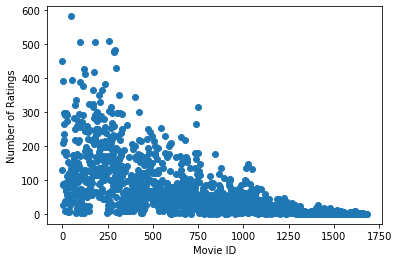

Median:  27.0
Average:  59.0 

Star Wars (1977)                                                                  583 ratings
Contact (1997)                                                                    509 ratings
Fargo (1996)                                                                      508 ratings
Return of the Jedi (1983)                                                         507 ratings
Liar Liar (1997)                                                                  485 ratings
English Patient, The (1996)                                                       481 ratings
Scream (1996)                                                                     478 ratings
Toy Story (1995)                                                                  452 ratings
Air Force One (1997)                                                              431 ratings
Independence Day (ID4) (1996)                                                     429 ratings


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
import statistics

hash_map = {}
movies = []

for i in range(1682):
    hash_map[i] = 0

# Reading dataset
f = open("u.data", "r", encoding = "ISO-8859-1")
lines = f.readlines()
for line in lines:
    # user id | item id | rating | timestamp
    line = line.split()
    # int(line[0])-1 because the index of the movies row in matrix starts at 0
    movie = int(line[1])-1
    hash_map[movie] += 1
f.close()

with open("user_similarity_matrix.txt", 'w') as f:
    f.write("\t" + "Movies" + "\n")
    with open("u.item", "r", encoding = "ISO-8859-1") as f1:
        lines = f1.readlines()
        for line in lines:
            line = line.split("|")
            movies.append(line[1])
f.close()

xpoints = []
ypoints = []

for i in range(1682):
    xpoints.append(i)
    ypoints.append(hash_map[i])
    
plt.scatter(xpoints, ypoints,  marker='o');
plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.savefig('data.png', bbox_inches='tight')
plt.show()

print("Median: ", statistics.median(list(hash_map.values())))
print("Average: ", round(mean(list(hash_map.values()))), "\n")

#Printing top ten results
for i in range(10):
    max_key = max(hash_map, key=hash_map.get)
    print(movies[max_key].ljust(81, " "), str(hash_map[max_key]), "ratings")
    hash_map.pop(max_key)